In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
stroke_dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
from sklearn.preprocessing import LabelEncoder

# Membuat instance dari LabelEncoder
label_encoder = LabelEncoder()

# Menghapus baris dengan nilai NaN di kolom 'bmi'
stroke_dataset.dropna(subset=['bmi'], inplace=True)

# Menghapus kolom 'id'
stroke_dataset.drop(columns=['id'], inplace=True)

# Meng-encode kolom-kolom kategorikal
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
for col in categorical_cols:
    stroke_dataset[col] = label_encoder.fit_transform(stroke_dataset[col])

# Menampilkan hasil
print(stroke_dataset)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
5          1  81.0             0              0             1          2   
...      ...   ...           ...            ...           ...        ...   
5104       0  13.0             0              0             0          4   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0              

In [5]:
# Impor Library yang akan digunakan
import pandas as pd
from sklearn.preprocessing import RobustScaler


# Inisialisasi MinMaxScaler
scaler = RobustScaler()

# Memilih kolom yang ingin di-scaling
kolom_scaling = ['age','avg_glucose_level','bmi']

# Melakukan scaling pada kolom yang telah ditentukan
stroke_dataset[kolom_scaling] = scaler.fit_transform(stroke_dataset[kolom_scaling])
data_scaling = stroke_dataset
data_scaling

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.657143,0,1,1,2,1,3.753699,0.885417,1,1
2,1,1.028571,0,1,1,2,0,0.390137,0.458333,2,1
3,0,0.142857,0,0,1,2,1,2.179452,0.656250,3,1
4,0,1.000000,1,0,1,3,0,2.258630,-0.427083,2,1
5,1,1.057143,0,0,1,2,1,2.589863,0.093750,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,-0.885714,0,0,0,4,0,0.312329,-0.989583,0,0
5106,0,1.057143,0,0,1,3,1,0.918356,1.239583,2,0
5107,0,-0.257143,0,0,1,3,0,-0.238082,0.260417,2,0
5108,1,0.200000,0,0,1,2,0,2.044110,-0.260417,1,0


In [6]:
# Spliting Dataset
from sklearn.model_selection import train_test_split

# Mengambil fitur dan label dari dataset
X = data_scaling.drop(columns=['stroke'])
y = data_scaling[['stroke']]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13236\1434041336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='stroke', data=data_scaling, palette='ch:start=.2,rot=-.3')


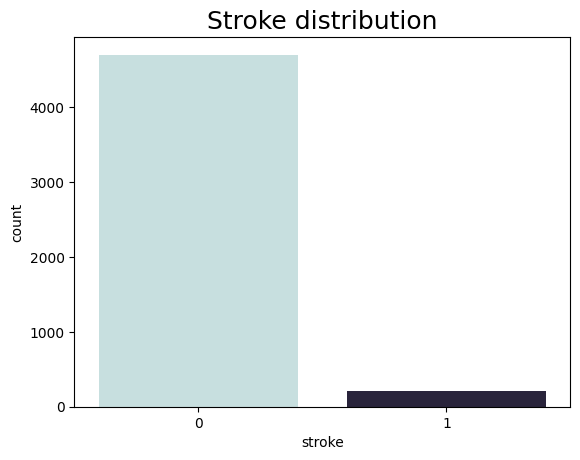

In [7]:
# Assuming stroke_dataset is already defined and contains a 'stroke' column
ax = sns.countplot(x='stroke', data=data_scaling, palette='ch:start=.2,rot=-.3')

# Setting the title with the correct function call
plt.title('Stroke distribution', fontsize=18)

# Display the plot
plt.show()

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)

In [9]:
y_smote.value_counts()

stroke
0         4700
1         4700
Name: count, dtype: int64

In [10]:
# Membagi dataset menjadi data training+validation dan data test
X_train_val, X_test, y_train_val, y_test = train_test_split(X_smote, y_smote, test_size=0.1, random_state=0)
# Membagi data training+validation menjadi data training dan data validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=0)

# Menampilkan bentuk dari data latih dan data uji
print("Bentuk data latih (X_train):", X_train.shape)
print("Bentuk data validasi (X_val):", X_val.shape)
print("Bentuk data uji (X_test):", X_test.shape)
print("Bentuk target data latih (y_train):", y_train.shape)
print("Bentuk target data validasi (y_val):", y_val.shape)
print("Bentuk target data uji (y_test):", y_test.shape)

Bentuk data latih (X_train): (7614, 10)
Bentuk data validasi (X_val): (846, 10)
Bentuk data uji (X_test): (940, 10)
Bentuk target data latih (y_train): (7614, 1)
Bentuk target data validasi (y_val): (846, 1)
Bentuk target data uji (y_test): (940, 1)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model pada data training
clf.fit(X_train, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [12]:
# Evaluasi pada data validation
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

# Evaluasi pada data test
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Validation Accuracy: 0.9267139479905437
Test Accuracy: 0.9361702127659575


In [16]:
from sklearn.metrics import confusion_matrix

# Evaluasi pada data validation
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

# Generate confusion matrix for validation data
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
print(f'Validation Confusion Matrix:\n{val_confusion_matrix}')

# Evaluasi pada data test
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

# Generate confusion matrix for test data
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(f'Test Confusion Matrix:\n{test_confusion_matrix}')


Validation Accuracy: 0.9267139479905437
Validation Confusion Matrix:
[[396  50]
 [ 12 388]]
Test Accuracy: 0.9361702127659575
Test Confusion Matrix:
[[420  47]
 [ 13 460]]
